A Jupyter notebook for analyzing the pLDDT statistics of the AlphaFold2 and Clusters autoinhibitory and Two-Domain proteins.

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

In [195]:
'''
Load dataframes
'''

afAuto = pd.read_csv('./project_pipeline/data/af_autoinhibited_pLDDT.tsv', sep='\t').astype('object')
afMulti = pd.read_csv('./project_pipeline/data/af_multi_domain_pLDDT.tsv', sep='\t').astype('object')
cfAuto = pd.read_csv('./project_pipeline/data/cf_autoinhibited_pLDDT.tsv', sep='\t').astype('object')
cfMulti = pd.read_csv('./project_pipeline/data/cf_multi_domain_pLDDT.tsv', sep='\t').astype('object')

# Set style
plt.style.use('science')

In [196]:
# Get the hex codes for the colors so we can assign them to categories
pal = sns.color_palette('Set1')
print(pal.as_hex())

# Set the color palette. Our categories are "Single Domain", "Two-Domain", and "Autoinhibitory"
colors = {'Single Domain': pal[0], 'Two-Domain': pal[1], 'Autoinhibitory': pal[2], 'Full': pal[3], 'Clusters': pal[4]}
pal.as_hex()

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

We pivot our dataframes in order to graph them

In [197]:
# Functions to rename columns

def rename_auto_columns(df):
    df = df.rename(columns={'complex_mean_plddt': 'Complex', 'r1_mean_plddt': 'Region 1', 'r2_mean_plddt': 'Region 2'})

    return df

def rename_multi_columns(df):
    df = df.rename(columns={'complex_mean_plddt': 'Complex', 'r1_mean_plddt': 'Region 1', 'r2_mean_plddt': 'Region 2'})

    return df

# Quick functions to melt dataframes
def pivot_af_df(df):
    df = df.melt(id_vars=['uniprot', 'region_1', 'region_2', 'filename'], var_name='Section', value_name='Mean pLDDT')
    df['Mean pLDDT'] = df['Mean pLDDT'].astype(float)

    return df

def pivot_cf_df(df):
    df = df.melt(id_vars=['uniprot', 'cluster', 'region_1', 'region_2', 'filename'], var_name='Section', value_name='Mean pLDDT')
    df['Mean pLDDT'] = df['Mean pLDDT'].astype(float)

    return df

# Add signifier column
def add_auto_type(df):
    df['type'] = 'Autoinhibitory'

    return df

def add_multi_type(df):
    df['type'] = 'Two-Domain'

    return df

In [209]:
# Rename columns
af_auto = rename_auto_columns(afAuto)
af_multi = rename_multi_columns(afMulti)
cf_auto = rename_auto_columns(cfAuto)
cf_multi = rename_multi_columns(cfMulti)

# Pivot dataframes
afAuto_p = pivot_af_df(af_auto)
afMulti_p = pivot_af_df(af_multi)
cfAuto_p = pivot_cf_df(cf_auto)
cfMulti_p = pivot_cf_df(cf_multi)

# Add type column
afAuto_p = add_auto_type(afAuto_p)
afMulti_p = add_multi_type(afMulti_p)
cfAuto_p = add_auto_type(cfAuto_p)
cfMulti_p = add_multi_type(cfMulti_p)

# Concatenate dataframes
af = pd.concat([afAuto_p, afMulti_p])
cf = pd.concat([cfAuto_p, cfMulti_p])

print(len(af))

531


Now we chart them as boxplots

# Plot for All Autoinhibitory Proteins Compared to Multi-Domain Proteins

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Region 1_Autoinhibitory vs. Region 1_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:2.275e-10 U_stat=1.330e+03


Complex_Autoinhibitory vs. Complex_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:9.538e-17 U_stat=7.120e+02
Region 2_Autoinhibitory vs. Region 2_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:1.008e-07 U_stat=1.649e+03


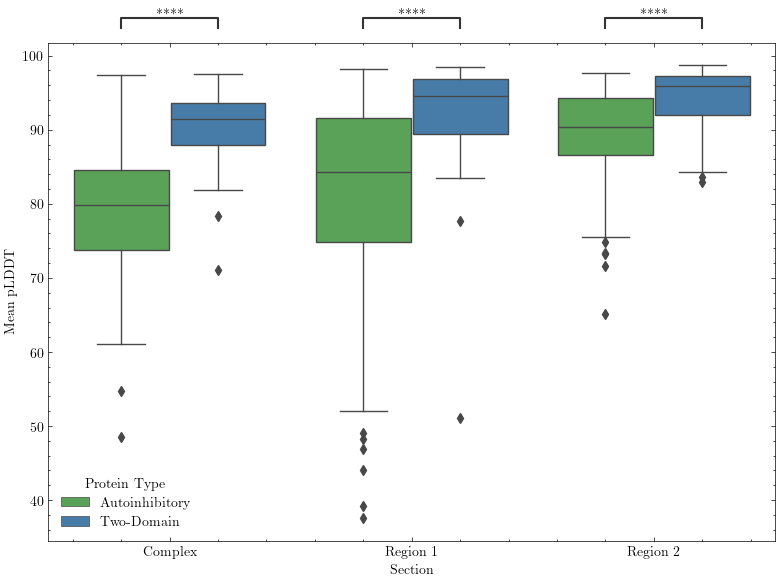

In [199]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=af, x='Section', y='Mean pLDDT', ax = ax, hue='type', palette=colors)
ax.set_ylabel('Mean pLDDT')
ax.set_xlabel('Section')
ax.legend(title='Protein Type')

# Annotate statistical significance
pairs = [[('Complex', 'Autoinhibitory'), ('Complex', 'Two-Domain')],
         [('Region 1', 'Autoinhibitory'), ('Region 1', 'Two-Domain')],
         [('Region 2', 'Autoinhibitory'), ('Region 2', 'Two-Domain')]]
subcat_order = ['Complex', 'Region 1', 'Region 2']
annotator = Annotator(ax, pairs, data=af, x='Section', y='Mean pLDDT', order=subcat_order, hue='type')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

# Save the figure
plt.tight_layout()
plt.savefig('./project_pipeline/data/figures/af_auto_multi_plddt1.png')

Let's do a boxplot for the reverse

In [200]:
# fig, ax = plt.subplots(figsize=(12, 8))
# sns.boxplot(data=af, x='type', y='Mean pLDDT', ax = ax, hue='Section', palette=colors)
# ax.set_ylabel('Mean pLDDT')
# ax.set_xlabel('Section')
# ax.legend(title='Section')

# # Annotate statistical significance
# pairs = [[('Autoinhibitory', 'Complex'), ('Autoinhibitory', 'Region 1')],
#          [('Autoinhibitory', 'Complex'), ('Autoinhibitory', 'Region 2')],
#          [('Autoinhibitory', 'Region 1'), ('Autoinhibitory', 'Region 2')],
#          [('Two-Domain', 'Complex'), ('Two-Domain', 'Region 1')],
#          [('Two-Domain', 'Complex'), ('Two-Domain', 'Region 2')],
#          [('Two-Domain', 'Region 1'), ('Two-Domain', 'Region 2')]]
# subcat_order = ['Autoinhibitory', 'Two-Domain']
# annotator = Annotator(ax, pairs, data=af, x='type', y='Mean pLDDT', order=subcat_order, hue='Section')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

# # Save the figure
# plt.savefig('./project_pipeline/data/figures/af_auto_multi_plddt2.png')

There are 123 proteins in the autoinhibited AlphaFold2 and 54 in the Two-Domain Alphafold2.

Now we'll look at only those proteins with two states

In [207]:
# Get list of two-state proteins
two = pd.read_csv('./project_pipeline/data/two_states.tsv', sep='\t').astype('object')
twolist = two['uniprot'].unique().tolist()

# Subset dataframe
af_two = afAuto[afAuto['uniprot'].isin(twolist)].reset_index(drop=True)

# Now rename and melt the dataframes
rename = rename_auto_columns(af_two)
af_twos = pivot_af_df(rename)
af_twos.head()

54


Now we'll plot those proteins with two states. First we plot against multi-domain proteins

In [212]:
# Concatenate dataframes
af_twos = add_auto_type(af_twos)
afTwoConcat = pd.concat([af_twos, afMulti_p]).reset_index(drop=True)
afTwoConcat.tail()

,uniprot,region_1,region_2,filename,Section,Mean pLDDT,type
211,Q63QJ1,71-219,260-558,AF-Q63QJ1-F1-model_v4.cif,Region 2,93.937,Two-Domain
212,Q8KHY3,82-257,361-631,AF-Q8KHY3-F1-model_v4.cif,Region 2,97.087,Two-Domain
213,Q2TU34,13-198,203-332,AF-Q2TU34-F1-model_v4.cif,Region 2,97.772,Two-Domain
214,B7LGE4,59-204,224-302,AF-B7LGE4-F1-model_v4.cif,Region 2,98.225,Two-Domain
215,A9T230,92-291,295-424,AF-A9T230-F1-model_v4.cif,Region 2,96.779,Two-Domain


# Plot for Two-State Autoinhibitory Proteins Compared To Multi-Domain Proteins

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Region 1_Autoinhibitory vs. Region 1_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:6.023e-05 U_stat=1.770e+02
Complex_Autoinhibitory vs. Complex_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:7.930e-06 U_stat=1.420e+02
Region 2_Autoinhibitory vs. Region 2_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:1.373e-02 U_stat=2.960e+02


(<Axes: xlabel='Section', ylabel='Mean pLDDT'>,
  <statannotations.Annotation.Annotation at 0x7f77bd177850>])

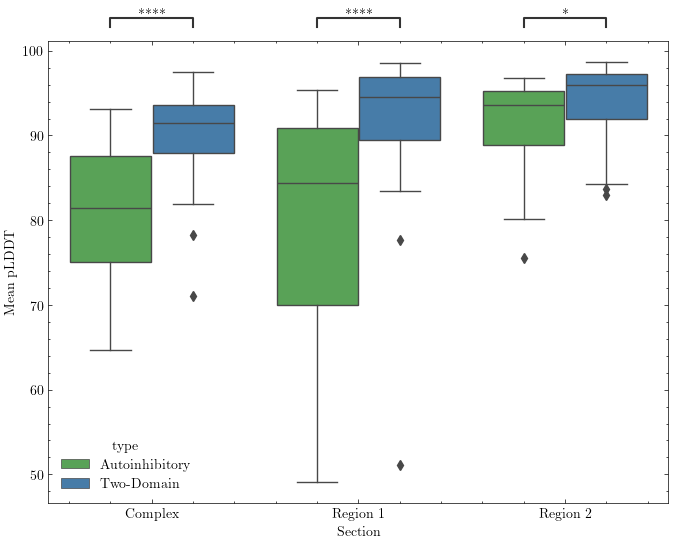

In [213]:
# Now we plot 
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=afTwoConcat, x='Section', y='Mean pLDDT', ax = ax, hue='type', palette=colors)

# Annotate statistical significance
pairs = [[('Complex', 'Autoinhibitory'), ('Complex', 'Two-Domain')],
         [('Region 1', 'Autoinhibitory'), ('Region 1', 'Two-Domain')],
         [('Region 2', 'Autoinhibitory'), ('Region 2', 'Two-Domain')]]
subcat_order = ['Complex', 'Region 1', 'Region 2']
annotator = Annotator(ax, pairs, data=afTwoConcat, x='Section', y='Mean pLDDT', order=subcat_order, hue='type')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

Then we plot against the ColabFold clusters.

# Plot for Two-State Autoinhibitory Proteins Compared to ColabFold Clusters

In [204]:
# Add sources for the two dataframes
af_twos['Sequence Depth'] = 'Full'
cfAuto_p['Sequence Depth'] = 'Clusters'

two_states = pd.concat([af_twos, cfAuto_p])
two_states.head()

,uniprot,region_1,region_2,filename,Section,Mean pLDDT,type,Sequence Depth,cluster
0,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Complex,85.817,Autoinhibitory,Full,NaN
1,O60741,401-479,480-604,F-O60741-F1-model_v3.cif,Complex,70.564,Autoinhibitory,Full,NaN
2,P07038,892-917,562-625,F-P07038-F1-model_v3.cif,Complex,77.453,Autoinhibitory,Full,NaN
3,P12931,"249-269,151-248","84-145,524-536",F-P12931-F1-model_v3.cif,Complex,84.513,Autoinhibitory,Full,NaN
4,P21333,2142-2235,2236-2325,F-P21333-F1-model_v3.cif,Complex,77.384,Autoinhibitory,Full,NaN


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Region 1_Full vs. Region 1_Clusters: Mann-Whitney-Wilcoxon test two-sided, P_val:2.060e-05 U_stat=2.380e+03
Complex_Full vs. Complex_Clusters: Mann-Whitney-Wilcoxon test two-sided, P_val:3.087e-04 U_stat=2.242e+03
Region 2_Full vs. Region 2_Clusters: Mann-Whitney-Wilcoxon test two-sided, P_val:2.050e-06 U_stat=2.484e+03


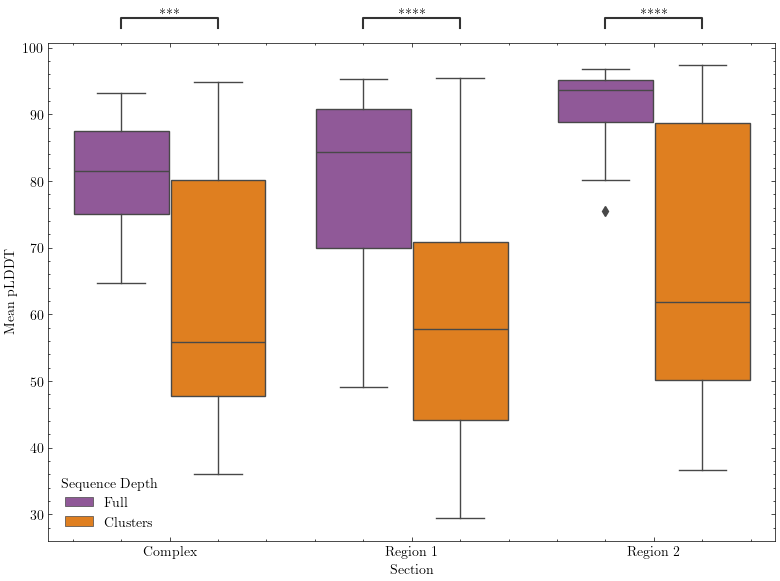

In [205]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=two_states, x='Section', y='Mean pLDDT', ax=ax, hue='Sequence Depth', palette=colors)
ax.set_xlabel('Section')
ax.set_ylabel('Mean pLDDT')

# Annotate statistical significance
pairs = [[('Complex', 'Full'), ('Complex', 'Clusters')],
         [('Region 1', 'Full'), ('Region 1', 'Clusters')],
         [('Region 2', 'Full'), ('Region 2', 'Clusters')]]

subcat_order = ['Complex', 'Region 1', 'Region 2']
annotator = Annotator(ax, pairs, data=two_states, x='Section', y='Mean pLDDT', order=subcat_order, hue='Sequence Depth')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.savefig('./project_pipeline/data/figures/af_two_states_plddt1.png')

Now we do the reverse

In [206]:
# # Reverse Section and source in the previous plot  
# fig, ax = plt.subplots(figsize=(8, 6))
# sns.boxplot(data=two_states, x='Sequence Depth', y='Mean pLDDT', ax=ax, hue='Section', palette=colors)
# ax.set_title('Two-state Protein pLDDTs by Source')
# ax.set_xlabel('Source')
# ax.set_ylabel('Mean pLDDT')
# ax.legend(title='Section')

# # Annotate statistical significance
# pairs = [[('Full', 'Complex'), ('Full', 'Region 1')],
#          [('Full', 'Complex'), ('Full', 'Region 2')],
#          [('Full', 'Region 1'), ('Full', 'Region 2')],
#          [('Clusters', 'Complex'), ('Clusters', 'Region 1')],
#          [('Clusters', 'Complex'), ('Clusters', 'Region 2')],
#          [('Clusters', 'Region 1'), ('Clusters', 'Region 2')]]

# subcat_order = ['Full', 'Clusters']
# annotator = Annotator(ax, pairs, data=two_states, x='Sequence Depth', y='Mean pLDDT', order=subcat_order, hue='Section')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
# annotator.apply_and_annotate()

# plt.savefig('./project_pipeline/data/figures/af_two_states_plddt2.png')